<a href="https://colab.research.google.com/github/xtenix88/Data-Portfolio/blob/main/Invest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np 
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
%matplotlib inline

import datetime as dt 

In [4]:
pip install yfinance


     |████████████████████████████████| 6.4 MB 7.4 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [28]:
import yfinance as yf

In [73]:
tickers = ['AMZN', 'COST', 'ADBE', 'QQQ', 'TQQQ', 'NVDA', 'VUG', 'VGT', 'VOO', 'SPY', 'ADBE','AMD', 'MSFT', 'DIS', 'WMT','TGT', 'HD','TSLA','ARKK']


In [74]:
S_DATE = "2021-02-24"
E_DATE = "2022-02-24"

In [75]:
for ticker in tickers:
  stock = yf.Ticker(ticker)
  df = stock.history(period="1y")
  df.sort_index(axis = 0.,  ascending=False)
  df.to_csv(ticker + '.csv')

In [53]:
PATH = '/content/'

In [76]:
def get_stock_df_from_csv(tickers):
  try:
    df = pd.read_csv(PATH + tickers + '.csv', index_col=0)
  except FileNotFoundError:
    print("File Doesn't Exist")
  else:
    return df

def merge_df_by_column_name(col_name, sdate, edate, *tickers):
  mult_df = pd.DataFrame()

  for x in tickers:
    df = get_stock_df_from_csv(x)
    mask = (df.index >= sdate) & (df.index <=edate)
    mult_df[x] = df.loc[mask][col_name]
  
  return mult_df

In [77]:
mult_df = merge_df_by_column_name('Close', S_DATE, E_DATE, *tickers)
mult_df

,AMZN,COST,ADBE,QQQ,TQQQ,NVDA,VUG,VGT,VOO,SPY,AMD,MSFT,DIS,WMT,TGT,HD,TSLA,ARKK
Date,,,,,,,,,,,,,,,,,,
2021-02-25,3057.159912,331.523254,459.160004,311.330109,43.950001,132.958878,250.655975,351.400665,346.688873,377.300629,82.419998,227.139847,190.979996,129.884506,182.433197,250.026749,682.219971,128.449585
2021-02-26,3092.929932,328.643921,459.670013,312.633881,44.610001,137.025345,251.541214,353.912292,344.785370,375.356567,84.510002,230.502472,189.039993,127.886284,180.816650,253.053543,675.500000,129.292633
2021-03-01,3146.139893,329.408447,469.570007,322.038544,48.500000,138.296707,258.344696,365.586914,353.198181,384.455261,86.389999,235.025620,194.979996,129.313599,183.428757,256.266418,718.429993,135.580719
2021-03-02,3094.530029,326.121979,466.589996,316.873413,46.174999,133.945496,254.843475,359.124176,350.466187,381.455261,84.129997,231.980423,193.940002,128.073318,171.008942,254.963623,686.440002,132.416840
2021-03-03,3005.000000,321.614349,448.450012,307.677704,42.169998,127.935776,247.850983,349.266266,345.840698,376.402618,80.860001,225.721405,192.259995,125.592758,171.127228,252.093552,653.200012,124.085625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-17,3093.050049,515.010010,457.709991,345.450012,52.209999,245.070007,277.549988,403.130005,401.859985,437.059998,112.370003,290.730011,152.949997,138.880005,204.000000,347.940002,876.349976,68.180000
2022-02-18,3052.030029,512.669983,442.559998,341.510010,50.439999,236.419998,274.410004,398.089996,399.290009,434.230011,113.830002,287.929993,151.360001,137.990005,204.389999,346.869995,856.979980,64.800003
2022-02-22,3003.949951,502.179993,438.399994,338.079987,48.880001,233.899994,270.440002,394.179993,394.920013,429.570007,115.650002,287.720001,148.089996,136.449997,196.350006,316.170013,821.530029,63.389999


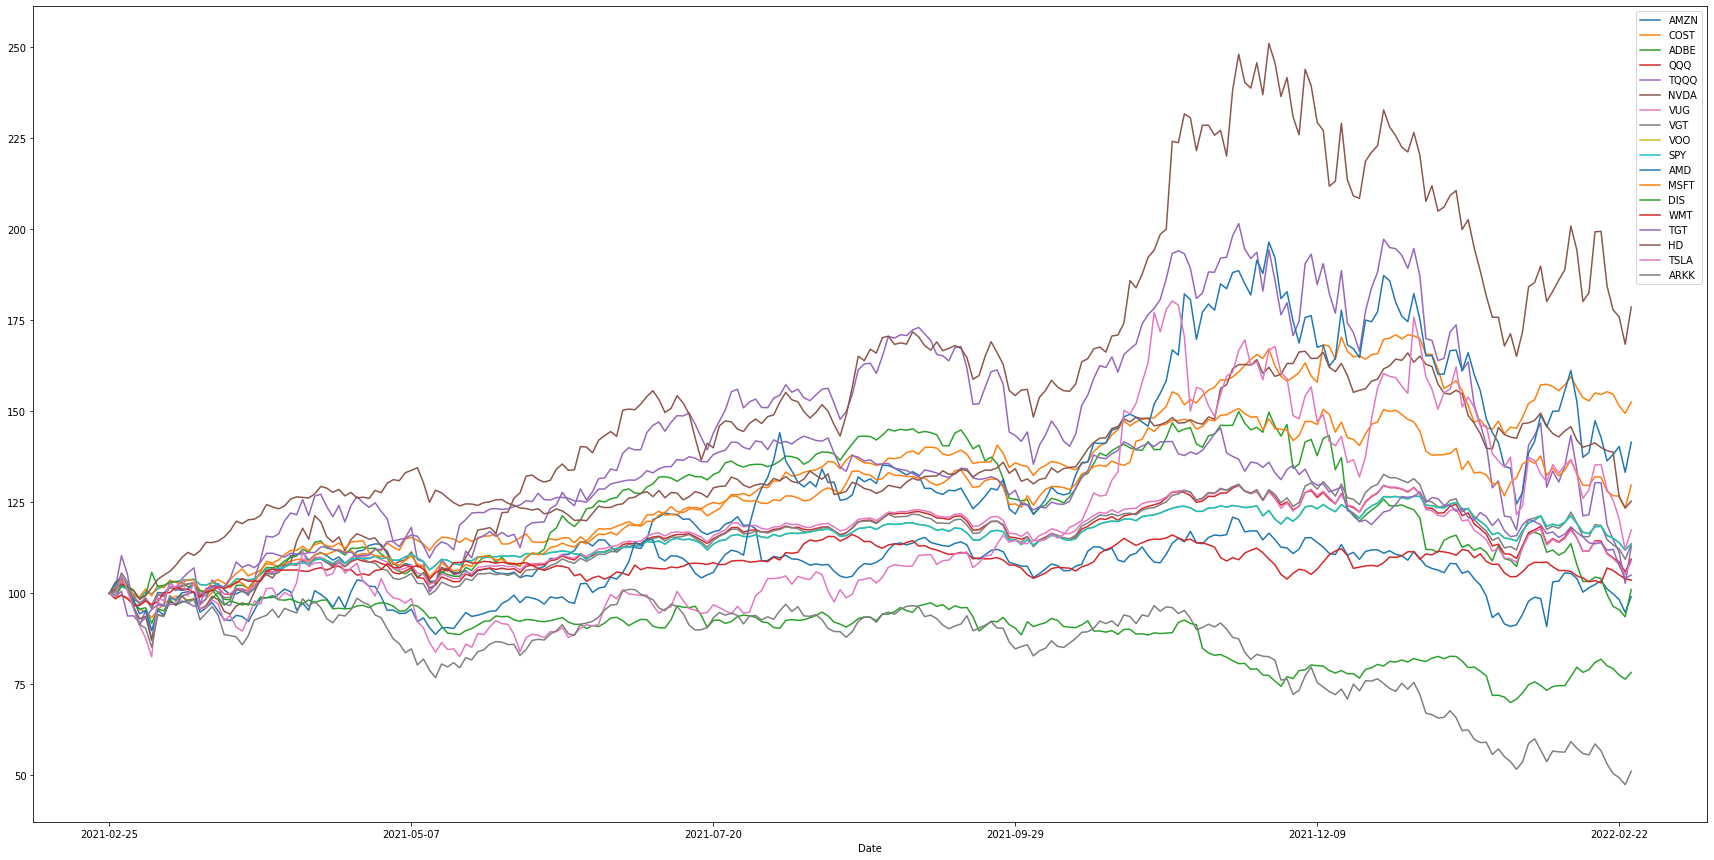

In [79]:
def plot_return_mult_stocks(investment, stock_df):
    (stock_df / stock_df.iloc[0] * investment).plot(figsize = (30,15))

plot_return_mult_stocks(100, mult_df)

In [56]:
# Add Simple Rate of Return = (End Price - Beginning Price) / Beginning Price OR (EP / BP) - 1

def daily_return_to_df(df, ticker):
    df['Daily Return'] = (df['Close'] / df['Close'].shift(1)) - 1
    df.to_csv("/content/" + ticker + '.csv')
    return df  

In [60]:
# Total return over time

def get_total_return(df, sdate,edate):
  
    df.reset_index(inplace=True)

    df['Date'] = pd.to_datetime(df['Date'])
    
    mask = (df['Date'] >= sdate) & (df['Date'] <= edate)
    
    daily_ret = df.loc[mask]['Daily Return'].mean()
    
    # Get the number of days between 2 dates
    df2 = df.loc[mask]
    days = df2.shape[0]

    # Return the total return between 2 dates
    return (days * daily_ret)

In [101]:
def summary(ticker, sdate, edate):
  df = get_stock_df_from_csv(ticker)
  daily_return_to_df(df, ticker)
  total_return = get_total_return(df,sdate, edate) * 100
  print(ticker, "Total Return is:", total_return, "%")


In [109]:
for ticker in tickers:
  summary(ticker,S_DATE, E_DATE )


AMZN Total Return is: 3.4714514571735653 %
COST Total Return is: 44.449538431195954 %
ADBE Total Return is: 6.361897242163954 %
QQQ Total Return is: 11.02911628148423 %
TQQQ Total Return is: 30.10693740729054 %
NVDA Total Return is: 69.82326191465064 %
VUG Total Return is: 10.356074156600124 %
VGT Total Return is: 14.889868541914106 %
VOO Total Return is: 13.757460867625754 %
SPY Total Return is: 13.707919441398179 %
ADBE Total Return is: 6.361897242163954 %
AMD Total Return is: 46.07067491488703 %
MSFT Total Return is: 28.729965607011167 %
DIS Total Return is: -21.589691245472867 %
WMT Total Return is: 4.774028804544028 %
TGT Total Return is: 7.582969858038899 %
HD Total Return is: 25.229116084910952 %
TSLA Total Return is: 32.19546872253435 %
ARKK Total Return is: -57.706226792465586 %
